In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
diamond_df = pd.read_csv('diamond_refined.csv')
diamond_df = diamond_df.drop(['Unnamed: 0'], axis=1)
diamond_df[:5]

,carat,depth,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.422530,-0.304482,55.0,326,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,-1.489484,-1.391202,61.0,326,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,-1.422530,-2.747453,65.0,327,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,-1.228012,0.574595,58.0,334,False,False,False,True,False,False,...,True,False,False,False,False,False,False,True,False,False
4,-1.165179,1.310017,58.0,335,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,False,False


In [3]:
# 스코어 구하기 - 계수 포함
def get_mse_r2score(model, y_test, y_pred):
	coef = model.coef_
	intercept = model.intercept_
	mse = mean_squared_error(y_test, y_pred)
	rmse = np.sqrt(mse)
	r2 = r2_score(y_test, y_pred)
	mae = mean_absolute_error(y_test, y_pred)

	print("계수 (coef_):\n", coef)
	print("절편 (intercept):", intercept)
	print("평균제곱오차 (MSE):", mse)
	print("평균제곱근오차 (RMSE):", rmse)
	print("평균절대오차 (MAE):", mae)
	print("결정계수 (r2_score):", r2)

	return mae, coef, intercept, rmse, r2

In [4]:
# 회귀식 구하기
def get_formula(title, model):
   formula = f"{title} = " + str(round(model.intercept_, 4)) + " + "
   coef_list = []
   for feature_name, coef in zip(model.feature_names_in_, model.coef_):
      coef_list.append(f"{feature_name} * {coef:.4f}")
   formula += " + ".join(coef_list)
   return formula

In [5]:
# 스코어 구하기 - 계수 미포함
def get_mse_r2score2(y_test, y_pred):
	mse = mean_squared_error(y_test, y_pred)
	rmse = np.sqrt(mse)
	r2 = r2_score(y_test, y_pred)
	mae = mean_absolute_error(y_test, y_pred)

	print("평균제곱오차 (MSE):", mse)
	print("평균제곱근오차 (RMSE):", rmse)
	print("평균절대오차 (MAE):", mae)
	print("결정계수 (r2_score):", r2)

	return mae, rmse, r2

In [6]:
# 최적 스코어 구하기
def get_best_mse_r2score(y_test, y_pred):
	mse = mean_squared_error(y_test, y_pred)
	rmse = np.sqrt(mse)
	r2 = r2_score(y_test, y_pred)
	mae = mean_absolute_error(y_test, y_pred)

	print("best 평균제곱오차 (MSE):", mse)
	print("best 평균제곱근오차 (RMSE):", rmse)
	print("best 평균절대오차 (MAE):", mae)
	print("best 결정계수 (r2_score):", r2)

	return mae, rmse, r2

In [7]:
# scatter plot 그리기
def get_scatter(model, y_test, y_pred):
	plt.scatter(y_test, y_pred, color='purple', alpha=0.5)
	plt.xlabel('실제값')
	plt.ylabel('예측값')
	plt.title(f'예측값 vs 실제값 ({model.__class__.__name__} 모델)')

	x_range = np.linspace(min(y_test), max(y_test), 100)
	plt.plot(x_range, x_range, linewidth=2, label=f'{model.__class__.__name__} 모델 추세선')

	plt.show()

In [8]:
from sklearn.model_selection import learning_curve

# learning_curves 그리기
def display_learning_curves(x, y, model, cv=5, shuffle=True):
    # scoring 고정
    scoring = 'r2'

    # 학습 곡선 계산
    train_sizes, train_scores, val_scores = learning_curve(
        estimator=model,
        X=x,
        y=y,
        cv=cv,
        scoring=scoring,
        error_score='raise',
        shuffle=shuffle
    )

    # 평균 계산
    train_mean = train_scores.mean(axis=1)
    val_mean   = val_scores.mean(axis=1)

    # 그래프 출력
    plt.figure()
    plt.plot(train_sizes, train_mean, label='Train R²')
    plt.plot(train_sizes, val_mean, label='Validation R²')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score')
    plt.title('Learning Curve')
    plt.legend()
    plt.grid(True)

    # 결과 DataFrame 생성 및 반환
    result_df = pd.DataFrame({
        'Training Size': train_sizes,
        'Train R²': train_mean,
        'Validation R²': val_mean,
        'Gap': train_mean - val_mean
    })

    return result_df

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

# 스코어 그래프 그리기
def get_errors_score(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

    metrics = ['MAE', 'RMSE', 'R2 Score']
    values = [mae, rmse, r2]

    bars = plt.bar(metrics, values, color=['skyblue', 'salmon', 'mediumseagreen'])
    plt.title('예측 결과 오류 지표 및 결정 계수')
    plt.ylabel('오류 값 및 R2 값')

    # 막대 위에 숫자 표시
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height,
                 f'{height:.4f}', ha='center', va='bottom')

    plt.show()


In [10]:
X = diamond_df.drop('price', axis=1)

diamond_df['price'] = np.log1p(diamond_df['price'])
y = diamond_df['price']

In [11]:
X_train, X_test, y_train, y_test = \
	train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(43152, 23) (10788, 23) (43152,) (10788,)


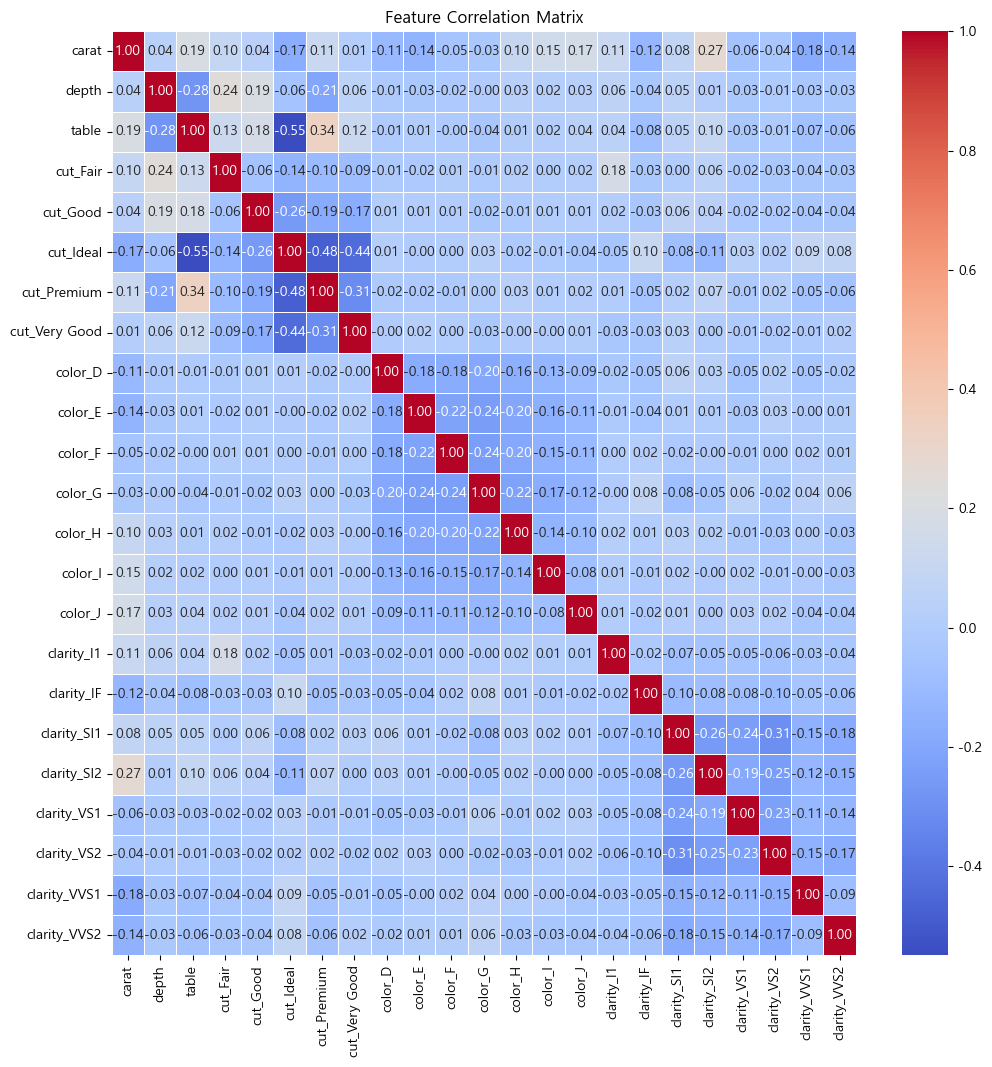

In [92]:
# 상관계수 계산
corr_matrix = diamond_df.drop('price', axis=1).corr()

# 상관계수 히트맵 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### LinearRegression

In [93]:
# 디폴트
from sklearn.linear_model import LinearRegression

# 모델 훈련
lr_rg = LinearRegression()
lr_rg.fit(X_train, y_train)

# 예측
y_pred = lr_rg.predict(X_test)

# 성능 평가
mae, coef, intercept, rmse, r2 = get_mse_r2score(lr_rg, y_test, y_pred)

계수 (coef_):
 [ 1.08817703 -0.00156942  0.00186641 -0.07887017 -0.00975114  0.05870843
  0.01829883  0.01161405  0.22716204  0.16732026  0.14277558  0.0667284
 -0.05646081 -0.19748221 -0.35004325 -0.73747259  0.3602494  -0.06128655
 -0.25126697  0.13276164  0.06302619  0.27031869  0.22367019]
절편 (intercept): 7.583763258656394
평균제곱오차 (MSE): 0.04378402451490467
평균제곱근오차 (RMSE): 0.20924632497347395
평균절대오차 (MAE): 0.1616873328357626
결정계수 (r2_score): 0.9575047200141056


In [94]:
formula = get_formula('y', lr_rg)
print(formula)

y = 7.5838 + carat * 1.0882 + depth * -0.0016 + table * 0.0019 + cut_Fair * -0.0789 + cut_Good * -0.0098 + cut_Ideal * 0.0587 + cut_Premium * 0.0183 + cut_Very Good * 0.0116 + color_D * 0.2272 + color_E * 0.1673 + color_F * 0.1428 + color_G * 0.0667 + color_H * -0.0565 + color_I * -0.1975 + color_J * -0.3500 + clarity_I1 * -0.7375 + clarity_IF * 0.3602 + clarity_SI1 * -0.0613 + clarity_SI2 * -0.2513 + clarity_VS1 * 0.1328 + clarity_VS2 * 0.0630 + clarity_VVS1 * 0.2703 + clarity_VVS2 * 0.2237


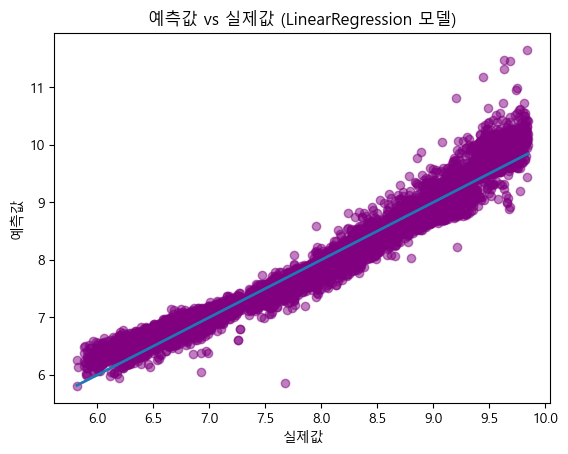

In [95]:
get_scatter(lr_rg, y_test, y_pred)

MAE: 0.1617
RMSE: 0.2092
R2 Score: 0.9575


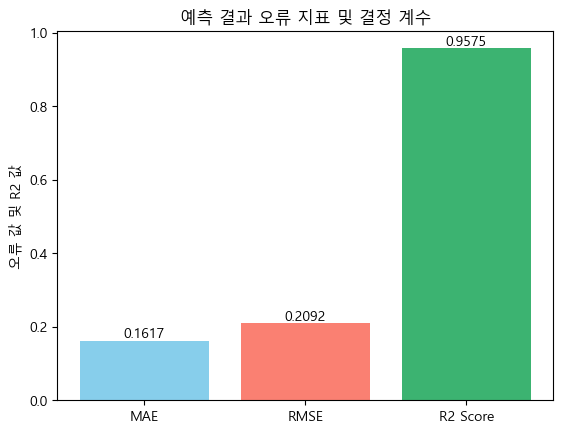

In [96]:
get_errors_score(y_test, y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.958555,0.812224,0.146331
1,14024,0.958230,0.815212,0.143018
2,23733,0.958318,0.814611,0.143706
3,33442,0.958166,0.816360,0.141807
4,43152,0.958345,0.817915,0.140430


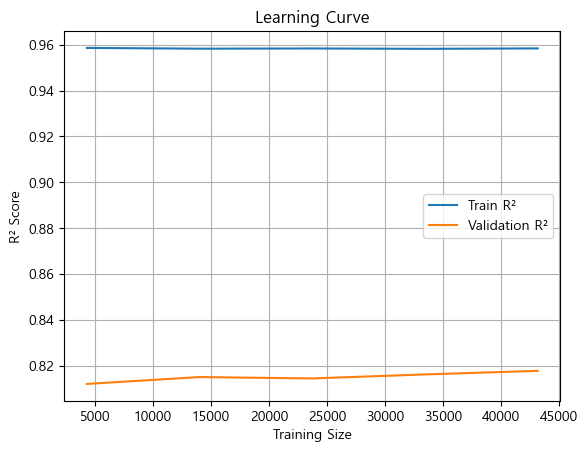

In [97]:
display_learning_curves(X, y, lr_rg, cv=5, shuffle=True)

### Ridge Regression

In [98]:
# 디폴트
from sklearn.linear_model import Ridge

ridge_rg = Ridge()
ridge_rg.fit(X_train, y_train)

y_pred = ridge_rg.predict(X_test)

mae, coef, intercept, rmse, r2 = get_mse_r2score(ridge_rg, y_test, y_pred)

계수 (coef_):
 [ 1.08809064 -0.00158349  0.00186374 -0.0789293  -0.00974098  0.05872858
  0.01830485  0.01163685  0.22706162  0.16724768  0.14272764  0.06671505
 -0.05646299 -0.19742531 -0.34986369 -0.7362181   0.35981891 -0.06137135
 -0.25128105  0.13261144  0.06290835  0.27005942  0.22347238]
절편 (intercept): 7.584031719204547
평균제곱오차 (MSE): 0.0437824618564502
평균제곱근오차 (RMSE): 0.20924259092366973
평균절대오차 (MAE): 0.1616845763512966
결정계수 (r2_score): 0.9575062366770729


In [99]:
formula = get_formula('y', ridge_rg)
print(formula)

y = 7.584 + carat * 1.0881 + depth * -0.0016 + table * 0.0019 + cut_Fair * -0.0789 + cut_Good * -0.0097 + cut_Ideal * 0.0587 + cut_Premium * 0.0183 + cut_Very Good * 0.0116 + color_D * 0.2271 + color_E * 0.1672 + color_F * 0.1427 + color_G * 0.0667 + color_H * -0.0565 + color_I * -0.1974 + color_J * -0.3499 + clarity_I1 * -0.7362 + clarity_IF * 0.3598 + clarity_SI1 * -0.0614 + clarity_SI2 * -0.2513 + clarity_VS1 * 0.1326 + clarity_VS2 * 0.0629 + clarity_VVS1 * 0.2701 + clarity_VVS2 * 0.2235


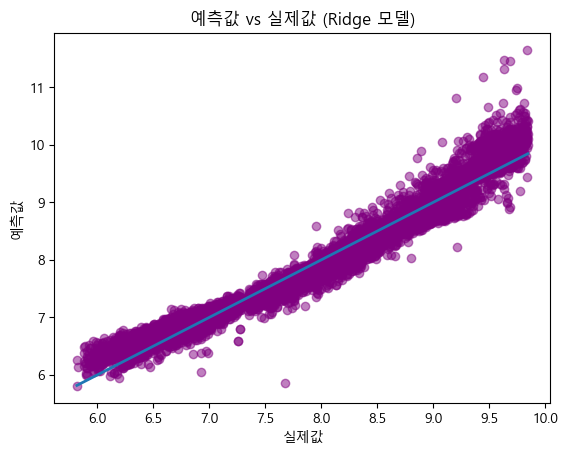

In [100]:
get_scatter(ridge_rg, y_test, y_pred)

MAE: 0.1617
RMSE: 0.2092
R2 Score: 0.9575


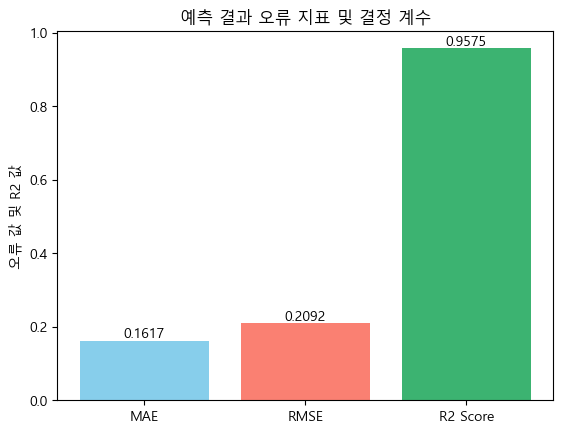

In [101]:
get_errors_score(y_test, y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.958306,0.820309,0.137997
1,14024,0.958139,0.819059,0.139080
2,23733,0.958532,0.818905,0.139626
3,33442,0.958296,0.818816,0.139480
4,43152,0.958345,0.817984,0.140361


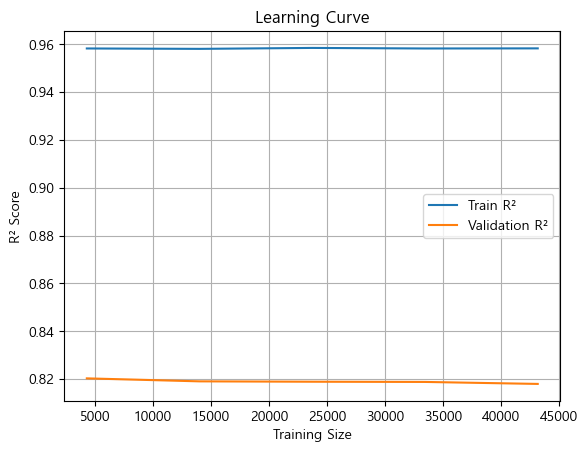

In [102]:
display_learning_curves(X, y, ridge_rg, cv=5, shuffle=True)

In [17]:
# 최적화 모델
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Ridge 회귀 모델
best_ridge_rg = Ridge()

# 파라미터 그리드 설정
param_grid = {
    'alpha': [0.05, 0.1, 10],
    'solver': ['sag', 'lbfgs']
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=best_ridge_rg, param_grid=param_grid, cv=5,
                           scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 확인
print("최적의 파라미터: ", grid_search.best_params_)

# 최적의 모델 예측
best_model = grid_search.best_estimator_
ridge_y_pred = best_model.predict(X_test)

최적의 파라미터:  {'alpha': 0.05, 'solver': 'sag'}


In [104]:
from sklearn.linear_model import Ridge

best_ridge_rg = Ridge(alpha=0.05, solver='sag')
best_ridge_rg.fit(X_train, y_train)

ridge_y_pred = best_ridge_rg.predict(X_test)

formula = get_formula('price', best_ridge_rg)
print(formula)

ridge_rmae, ridge_rmse, ridge_r2 = get_best_mse_r2score(y_test, ridge_y_pred)

price = 7.5844 + carat * 1.0882 + depth * -0.0016 + table * 0.0019 + cut_Fair * -0.0789 + cut_Good * -0.0097 + cut_Ideal * 0.0587 + cut_Premium * 0.0183 + cut_Very Good * 0.0116 + color_D * 0.2271 + color_E * 0.1673 + color_F * 0.1428 + color_G * 0.0667 + color_H * -0.0565 + color_I * -0.1974 + color_J * -0.3501 + clarity_I1 * -0.7373 + clarity_IF * 0.3602 + clarity_SI1 * -0.0613 + clarity_SI2 * -0.2513 + clarity_VS1 * 0.1327 + clarity_VS2 * 0.0630 + clarity_VVS1 * 0.2703 + clarity_VVS2 * 0.2236
best 평균제곱오차 (MSE): 0.04378405266994214
best 평균제곱근오차 (RMSE): 0.20924639225071992
best 평균절대오차 (MAE): 0.16168515955687446
best 결정계수 (r2_score): 0.957504692687787


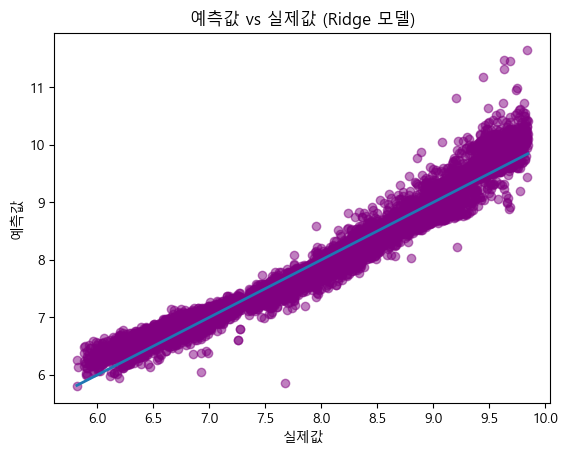

In [105]:
get_scatter(best_ridge_rg, y_test, ridge_y_pred)

MAE: 0.1617
RMSE: 0.2092
R2 Score: 0.9575


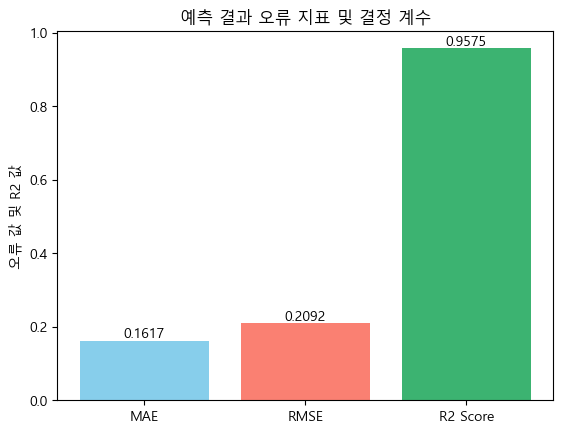

In [106]:
get_errors_score(y_test, ridge_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.959005,0.819708,0.139297
1,14024,0.958481,0.819233,0.139248
2,23733,0.958430,0.817843,0.140587
3,33442,0.958436,0.818126,0.140310
4,43152,0.958345,0.817919,0.140426


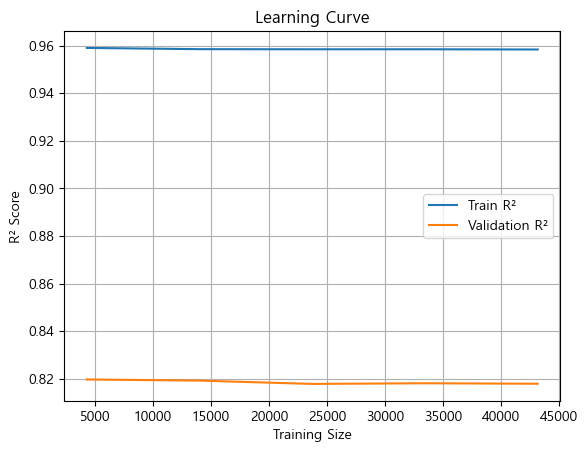

In [107]:
display_learning_curves(X, y, best_ridge_rg, cv=5, shuffle=True)

In [108]:
#  수동 파라미터 조절
from sklearn.linear_model import Ridge

re_ridge_rg = Ridge(alpha=0.1, fit_intercept=True, solver='sag', tol=0.0001)


re_ridge_rg.fit(X_train, y_train)

ridge_y_pred = re_ridge_rg.predict(X_test)

formula = get_formula('y', re_ridge_rg)
print(formula)

ridge_rmae, ridge_rmse, ridge_r2 = get_best_mse_r2score(y_test, ridge_y_pred)

y = 7.5831 + carat * 1.0882 + depth * -0.0016 + table * 0.0019 + cut_Fair * -0.0789 + cut_Good * -0.0097 + cut_Ideal * 0.0587 + cut_Premium * 0.0183 + cut_Very Good * 0.0116 + color_D * 0.2272 + color_E * 0.1673 + color_F * 0.1428 + color_G * 0.0668 + color_H * -0.0565 + color_I * -0.1975 + color_J * -0.3500 + clarity_I1 * -0.7372 + clarity_IF * 0.3602 + clarity_SI1 * -0.0613 + clarity_SI2 * -0.2513 + clarity_VS1 * 0.1327 + clarity_VS2 * 0.0630 + clarity_VVS1 * 0.2702 + clarity_VVS2 * 0.2237
best 평균제곱오차 (MSE): 0.043783858208827346
best 평균제곱근오차 (RMSE): 0.20924592758003044
best 평균절대오차 (MAE): 0.161683272057848
best 결정계수 (r2_score): 0.9575048814251087


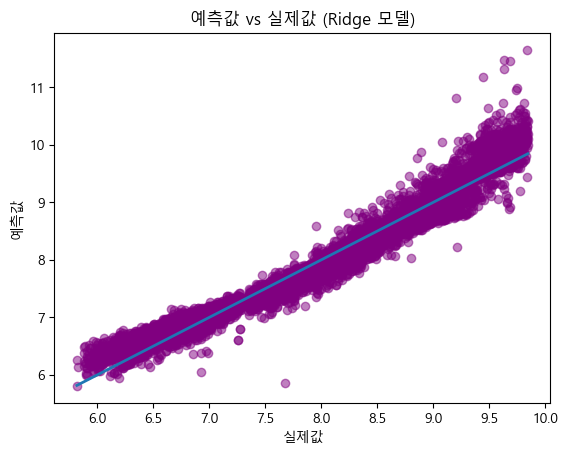

In [109]:
get_scatter(re_ridge_rg, y_test, ridge_y_pred)

MAE: 0.1617
RMSE: 0.2092
R2 Score: 0.9575


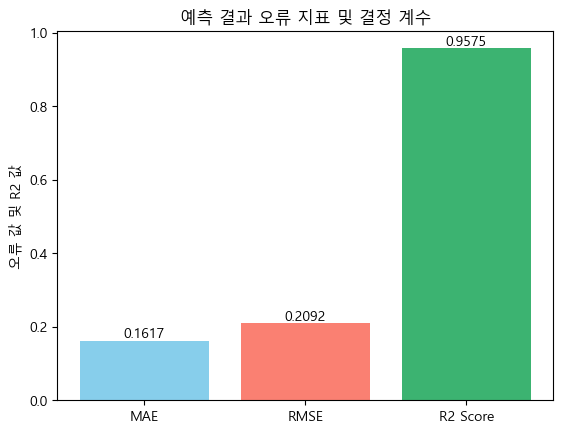

In [110]:
get_errors_score(y_test, ridge_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.958567,0.822158,0.136409
1,14024,0.958496,0.818932,0.139564
2,23733,0.958502,0.819876,0.138626
3,33442,0.958450,0.819242,0.139208
4,43152,0.958345,0.817924,0.140421


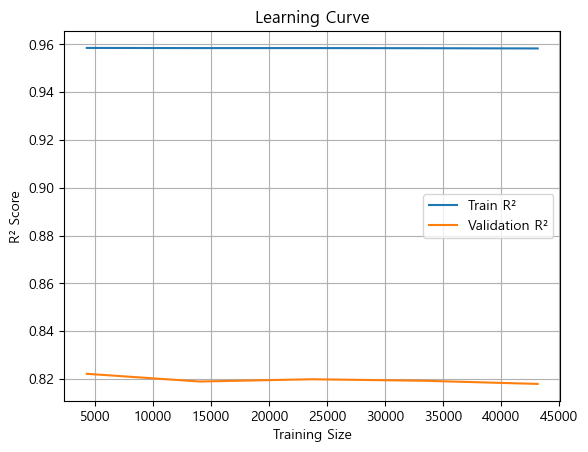

In [111]:
display_learning_curves(X, y, re_ridge_rg, cv=5, shuffle=True)

### Lasso Regression

In [112]:
# 디폴트
from sklearn.linear_model import Lasso

lasso_rg = Lasso()
lasso_rg.fit(X_train, y_train)

y_pred = lasso_rg.predict(X_test)

mae, coef, intercept, rmse, r2 = get_mse_r2score(lasso_rg, y_test, y_pred)

계수 (coef_):
 [ 0.  0.  0.  0.  0. -0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0. -0.  0.
  0. -0. -0. -0. -0.]
절편 (intercept): 7.789647004441008
평균제곱오차 (MSE): 1.0304503254461805
평균제곱근오차 (RMSE): 1.01511099168819
평균절대오차 (MAE): 0.8760723676283416
결정계수 (r2_score): -0.00011991991474014085


In [113]:
formula = get_formula('y', lasso_rg)
print(formula)

y = 7.7896 + carat * 0.0000 + depth * 0.0000 + table * 0.0000 + cut_Fair * 0.0000 + cut_Good * 0.0000 + cut_Ideal * -0.0000 + cut_Premium * 0.0000 + cut_Very Good * 0.0000 + color_D * -0.0000 + color_E * -0.0000 + color_F * -0.0000 + color_G * 0.0000 + color_H * 0.0000 + color_I * 0.0000 + color_J * 0.0000 + clarity_I1 * 0.0000 + clarity_IF * -0.0000 + clarity_SI1 * 0.0000 + clarity_SI2 * 0.0000 + clarity_VS1 * -0.0000 + clarity_VS2 * -0.0000 + clarity_VVS1 * -0.0000 + clarity_VVS2 * -0.0000


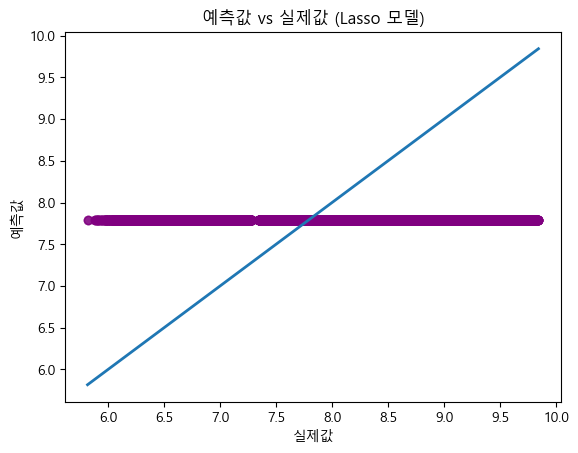

In [114]:
get_scatter(lasso_rg, y_test, y_pred)

MAE: 0.8761
RMSE: 1.0151
R2 Score: -0.0001


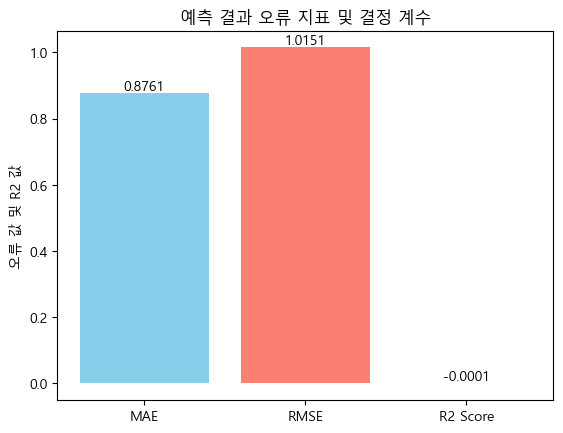

In [115]:
get_errors_score(y_test, y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.084696,-4.276285,4.360982
1,14024,0.080886,-4.273328,4.354213
2,23733,0.077984,-4.300814,4.378798
3,33442,0.076131,-4.274476,4.350607
4,43152,0.076343,-4.253600,4.329944


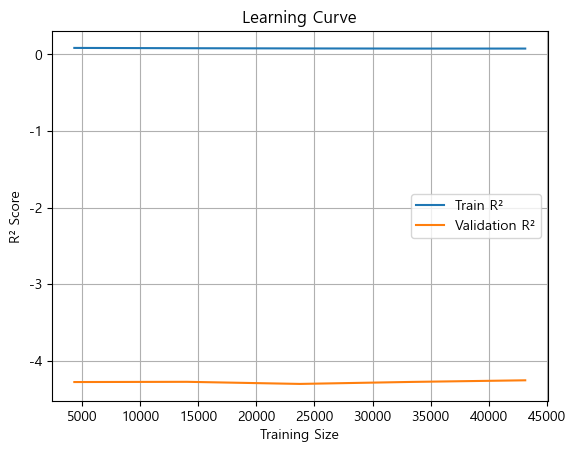

In [116]:
display_learning_curves(X, y, lasso_rg, cv=5, shuffle=True)

In [117]:
# 최적화 모델
best_lasso_rg = Lasso(max_iter=10000)

# 파라미터 그리드 설정
param_grid = {
    'alpha' : [0.001, 0.005, 0.01, 0.05],
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=best_lasso_rg, param_grid=param_grid, cv=5,
													 scoring='neg_mean_squared_error', n_jobs=-1)

# 모델 학습 (그리드 서치를 통해 최적 파라미터 찾기)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 파라미터: ", grid_search.best_params_)
print("최적의 점수: ", grid_search.best_score_)

# 최적의 모델 예측
best_model = grid_search.best_estimator_
lasso_y_pred = best_model.predict(X_test)

최적의 파라미터:  {'alpha': 0.001}
최적의 점수:  -0.04350407747797933


In [118]:
best_lasso_rg = Lasso(alpha=0.001)
best_lasso_rg.fit(X_train, y_train)

lasso_y_pred = best_lasso_rg.predict(X_test)

formula = get_formula('price', best_lasso_rg)
print(formula)

lasso_rmae, lasso_rmse, lasso_r2 = get_best_mse_r2score(y_test, lasso_y_pred)

price = 7.8658 + carat * 1.0797 + depth * -0.0059 + table * 0.0000 + cut_Fair * -0.0591 + cut_Good * -0.0091 + cut_Ideal * 0.0416 + cut_Premium * 0.0006 + cut_Very Good * 0.0000 + color_D * 0.1447 + color_E * 0.0891 + color_F * 0.0668 + color_G * 0.0000 + color_H * -0.1181 + color_I * -0.2533 + color_J * -0.3963 + clarity_I1 * -0.7556 + clarity_IF * 0.2306 + clarity_SI1 * -0.1477 + clarity_SI2 * -0.3322 + clarity_VS1 * 0.0316 + clarity_VS2 * -0.0242 + clarity_VVS1 * 0.1582 + clarity_VVS2 * 0.1181
best 평균제곱오차 (MSE): 0.04386594394013303
best 평균제곱근오차 (RMSE): 0.20944198227703306
best 평균절대오차 (MAE): 0.16164247100794266
best 결정계수 (r2_score): 0.957425211815626


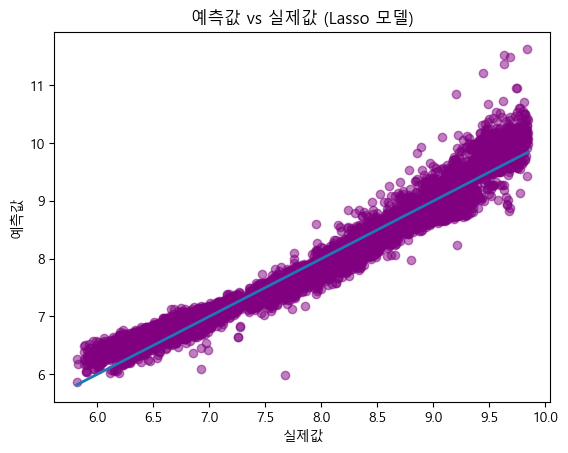

In [119]:
get_scatter(best_lasso_rg, y_test, lasso_y_pred)

MAE: 0.1616
RMSE: 0.2094
R2 Score: 0.9574


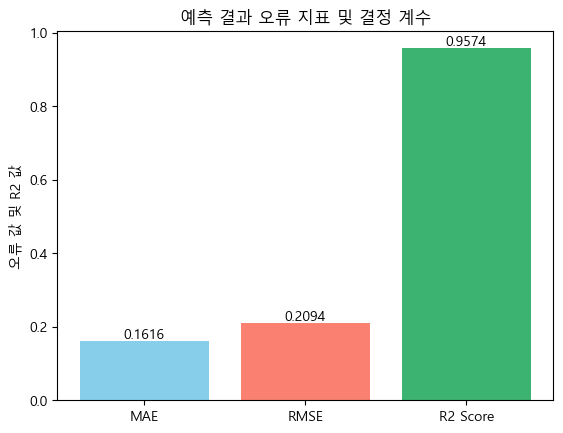

In [120]:
get_errors_score(y_test, lasso_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.958392,0.827770,0.130622
1,14024,0.958124,0.827107,0.131017
2,23733,0.958115,0.825206,0.132909
3,33442,0.957887,0.824667,0.133220
4,43152,0.958025,0.825663,0.132362


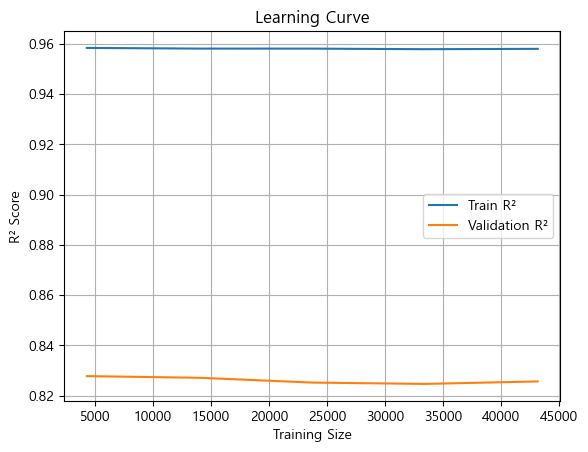

In [121]:
display_learning_curves(X, y, best_lasso_rg, cv=5, shuffle=True)

### LassoCV

In [46]:
# LassoCV 모델
from sklearn.linear_model import LassoCV

lscv_rg = LassoCV(random_state=42)
lscv_rg.fit(X_train, y_train)

print(f"최적의 알파 값: {lscv_rg.alpha_}")

lscv_y_pred = lscv_rg.predict(X_test)

lscv_rmae, lscv_coef, lscv_intercept, lscv_rmse, lscv_r2 = \
  get_mse_r2score(lscv_rg, y_test, y_pred)

최적의 알파 값: 0.0009653165812910378
계수 (coef_):
 [ 1.08004898e+00 -5.76085445e-03  0.00000000e+00 -6.00723647e-02
 -9.46335211e-03  4.16937407e-02  8.31441747e-04  0.00000000e+00
  1.45220180e-01  8.94505648e-02  6.70993873e-02  0.00000000e+00
 -1.18237627e-01 -2.53652000e-01 -3.97049441e-01 -7.58252515e-01
  2.31702728e-01 -1.48071313e-01 -3.32712237e-01  3.17529223e-02
 -2.45224430e-02  1.58778557e-01  1.18425492e-01]
절편 (intercept): 7.865874413168127
평균제곱오차 (MSE): 0.009945931867356874
평균제곱근오차 (RMSE): 0.0997292929251826
평균절대오차 (MAE): 0.07521715383753577
결정계수 (r2_score): 0.9903468179522857


In [123]:
formula = get_formula('price', lscv_rg)
print(formula)

price = 7.8659 + carat * 1.0800 + depth * -0.0058 + table * 0.0000 + cut_Fair * -0.0601 + cut_Good * -0.0095 + cut_Ideal * 0.0417 + cut_Premium * 0.0008 + cut_Very Good * 0.0000 + color_D * 0.1452 + color_E * 0.0895 + color_F * 0.0671 + color_G * 0.0000 + color_H * -0.1182 + color_I * -0.2537 + color_J * -0.3970 + clarity_I1 * -0.7583 + clarity_IF * 0.2317 + clarity_SI1 * -0.1481 + clarity_SI2 * -0.3327 + clarity_VS1 * 0.0318 + clarity_VS2 * -0.0245 + clarity_VVS1 * 0.1588 + clarity_VVS2 * 0.1184


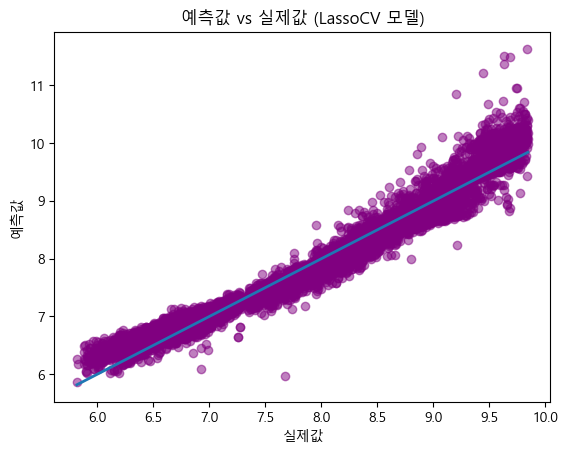

In [124]:
get_scatter(lscv_rg, y_test, lscv_y_pred)

MAE: 0.1616
RMSE: 0.2094
R2 Score: 0.9574


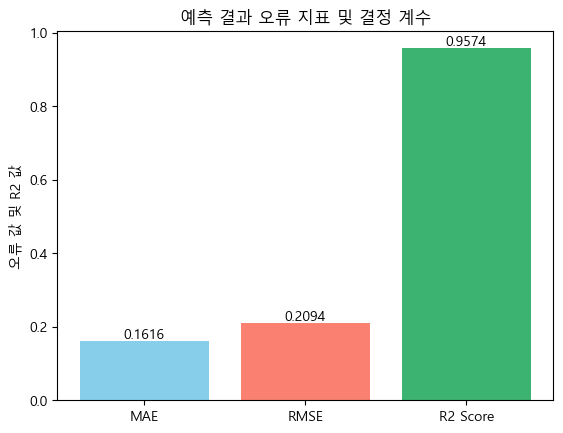

In [125]:
get_errors_score(y_test, lscv_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.957943,0.827359,0.130584
1,14024,0.958149,0.828169,0.129980
2,23733,0.957954,0.827076,0.130878
3,33442,0.957918,0.826516,0.131403
4,43152,0.958069,0.825461,0.132609


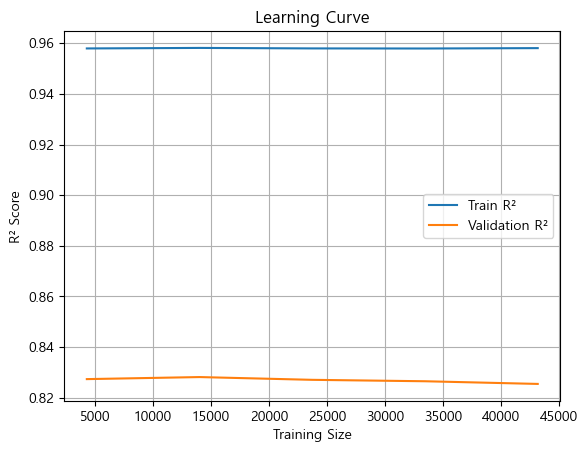

In [126]:
display_learning_curves(X, y, lscv_rg, cv=5, shuffle=True)

### Random Forest Regression

In [127]:
# 디폴트
from sklearn.ensemble import RandomForestRegressor

rf_rg = RandomForestRegressor(random_state=42)
rf_rg.fit(X_train, y_train)

y_pred = rf_rg.predict(X_test)

mae, rmse, r2 = get_mse_r2score2(y_test, y_pred)

평균제곱오차 (MSE): 0.01222423484318974
평균제곱근오차 (RMSE): 0.1105632617246332
평균절대오차 (MAE): 0.08139420494532715
결정계수 (r2_score): 0.9881355748351127


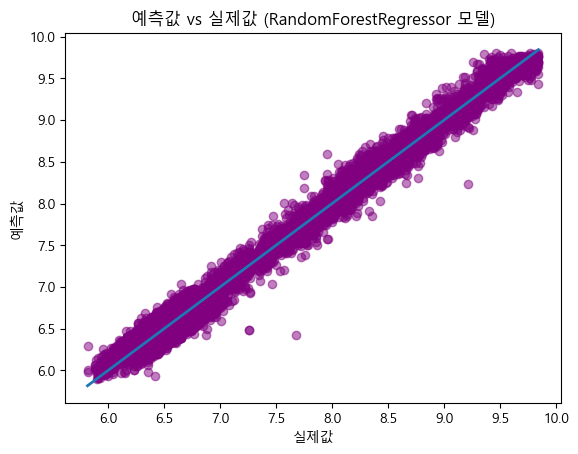

In [128]:
get_scatter(rf_rg, y_test, y_pred)

MAE: 0.0814
RMSE: 0.1106
R2 Score: 0.9881


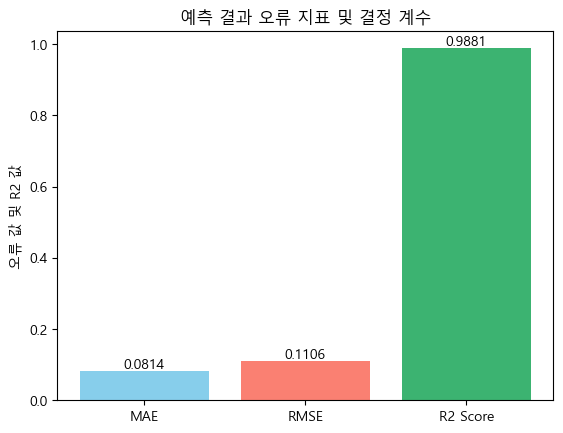

In [129]:
get_errors_score(y_test, y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.997936,0.682730,0.315205
1,14024,0.998040,0.709567,0.288473
2,23733,0.997846,0.720752,0.277095
3,33442,0.997656,0.732186,0.265470
4,43152,0.997458,0.734833,0.262625


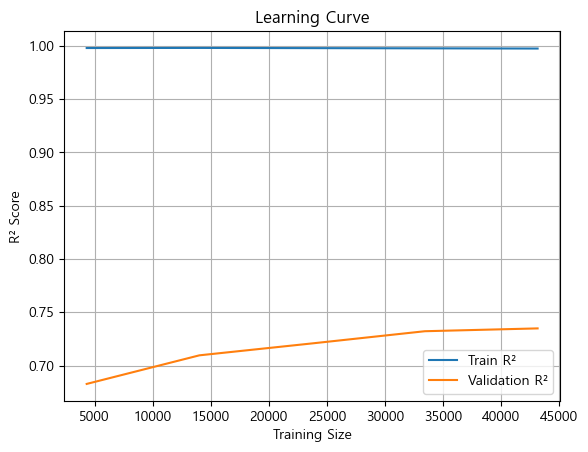

In [130]:
display_learning_curves(X, y, rf_rg, cv=5, shuffle=True)

In [131]:
# 최적화 모델
best_rf_rg = RandomForestRegressor(random_state=42)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10, 50, 100],
    'min_samples_leaf': [1, 2, 5]
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=best_rf_rg, param_grid=param_grid,
                           cv=5, scoring='r2', n_jobs=-1)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 파라미터: ", grid_search.best_params_)
print("최적의 점수: ", grid_search.best_score_)

# 최적의 모델 예측
best_model = grid_search.best_estimator_
rf_y_pred = best_model.predict(X_test)


최적의 파라미터:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
최적의 점수:  0.9894828514640434


In [132]:
from sklearn.ensemble import RandomForestRegressor

best_rf_rg = RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300)
best_rf_rg.fit(X_train, y_train)

rf_y_pred = best_rf_rg.predict(X_test)

rf_mae, rf_rmse, rf_r2 = get_best_mse_r2score(y_test, rf_y_pred)

best 평균제곱오차 (MSE): 0.010578253899117887
best 평균제곱근오차 (RMSE): 0.10285063878808866
best 평균절대오차 (MAE): 0.07691112639931724
best 결정계수 (r2_score): 0.9897331077673805


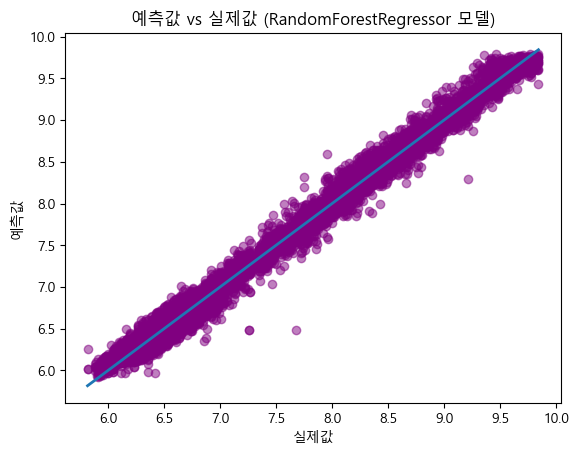

In [133]:
get_scatter(best_rf_rg, y_test, rf_y_pred)

MAE: 0.0769
RMSE: 0.1029
R2 Score: 0.9897


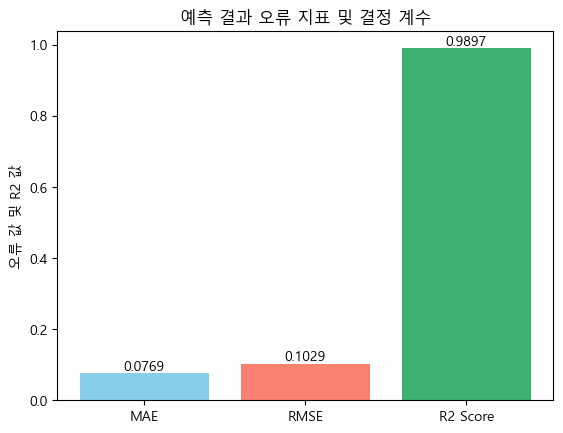

In [134]:
get_errors_score(y_test, rf_y_pred)

In [ ]:
display_learning_curves(X, y, best_rf_rg, cv=5, shuffle=True)

In [59]:
#  수동 파라미터 조절
from sklearn.ensemble import RandomForestRegressor

re_rf_rg = RandomForestRegressor(
    random_state=42,
    max_depth=15,
    min_samples_leaf=3,
    min_samples_split=15,
    n_estimators=250,
    n_jobs=-1
)
re_rf_rg.fit(X_train, y_train)

rf_y_pred = re_rf_rg.predict(X_test)

rf_mae, rf_rmse, rf_r2 = get_best_mse_r2score(y_test, rf_y_pred)

best 평균제곱오차 (MSE): 0.010790996700606192
best 평균제곱근오차 (RMSE): 0.10387972227824924
best 평균절대오차 (MAE): 0.07856945468959338
best 결정계수 (r2_score): 0.9895266268644852


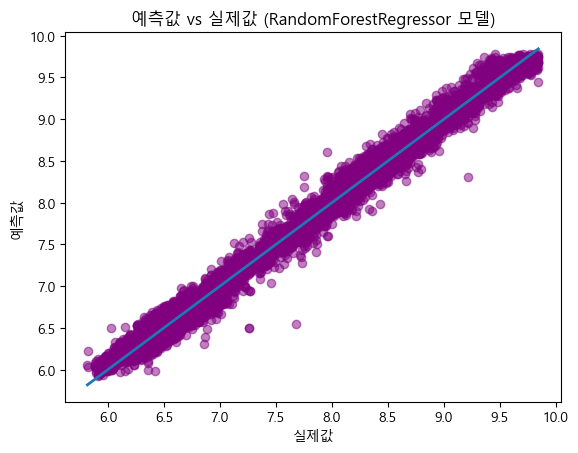

In [56]:
get_scatter(re_rf_rg, y_test, rf_y_pred)

MAE: 0.0786
RMSE: 0.1039
R2 Score: 0.9895


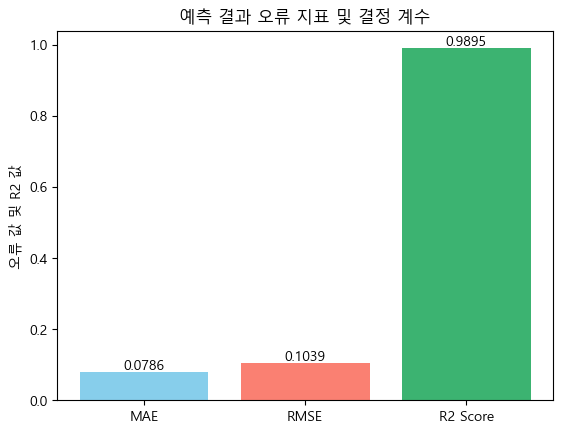

In [57]:
get_errors_score(y_test, rf_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.990225,0.669292,0.320933
1,14024,0.992151,0.698702,0.293449
2,23733,0.992313,0.714204,0.278109
3,33442,0.992414,0.731379,0.261035
4,43152,0.992398,0.730662,0.261737


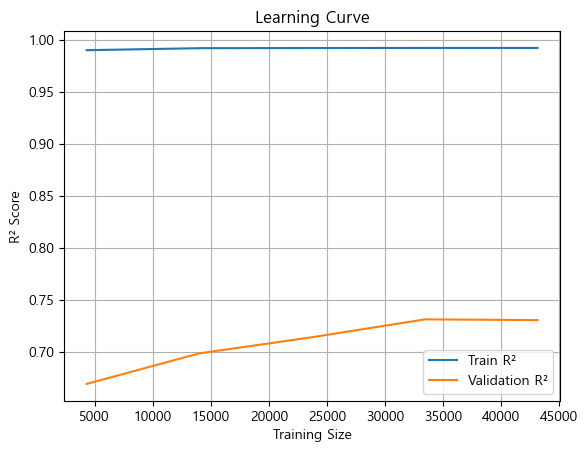

In [60]:
display_learning_curves(X, y, re_rf_rg, cv=5, shuffle=True)

### XGBoost

In [12]:
# 디폴트
from xgboost import XGBRegressor

xgb_rg = XGBRegressor(random_state=42)

xgb_rg.fit(X_train, y_train)

y_pred = xgb_rg.predict(X_test)

mae, rmse, r2 = get_mse_r2score2(y_test, y_pred)

평균제곱오차 (MSE): 0.009871731443498281
평균제곱근오차 (RMSE): 0.09935658731809523
평균절대오차 (MAE): 0.07460435303328146
결정계수 (r2_score): 0.9904188343514605


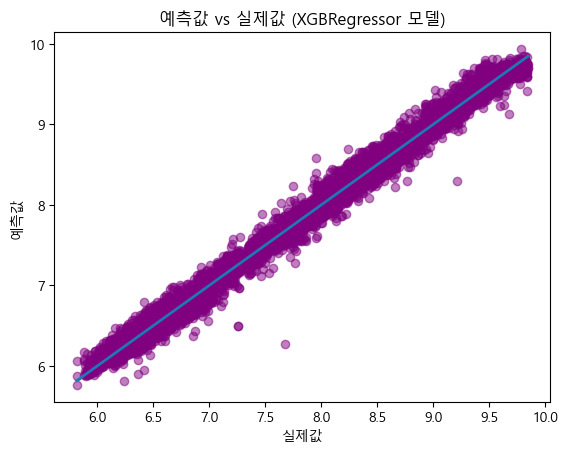

In [13]:
get_scatter(xgb_rg, y_test, y_pred)

MAE: 0.0746
RMSE: 0.0994
R2 Score: 0.9904


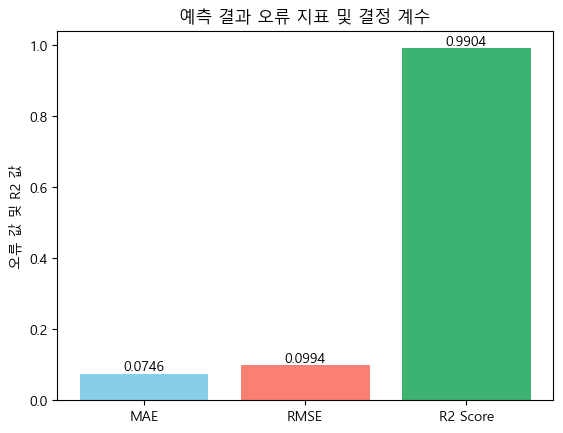

In [14]:
get_errors_score(y_test, y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.996421,0.750965,0.245456
1,14024,0.993997,0.791712,0.202285
2,23733,0.993154,0.804460,0.188694
3,33442,0.992804,0.824034,0.168770
4,43152,0.992626,0.832907,0.159719


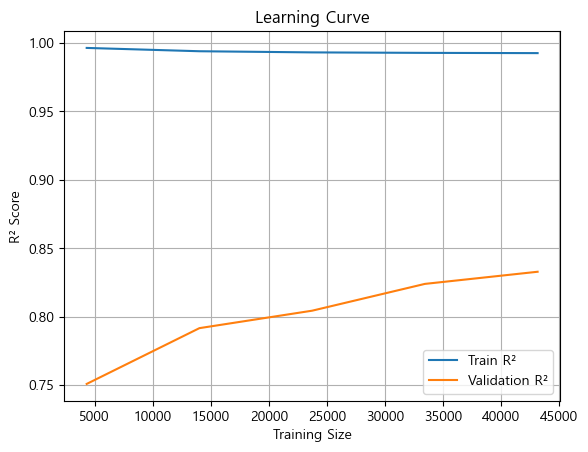

In [15]:
display_learning_curves(X, y, xgb_rg, cv=5, shuffle=True)

In [18]:
# 최적화 모델
best_xgb_rg = XGBRegressor(random_state=42, objective='reg:squarederror')

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.5],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(
    estimator=best_xgb_rg,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("최적의 파라미터: ", grid_search.best_params_)
print("최적의 점수: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
xgb_y_pred = best_model.predict(X_test)

# 성능 평가
xgb_mae, xgb_rmse, xgb_r2 = get_best_mse_r2score(y_test, xgb_y_pred)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
최적의 파라미터:  {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
최적의 점수:  0.9906611199727736
best 평균제곱오차 (MSE): 0.009509061110869443
best 평균제곱근오차 (RMSE): 0.09751441488759209
best 평균절대오차 (MAE): 0.07271590111216582
best 결정계수 (r2_score): 0.9907708297995352


In [19]:
from xgboost import XGBRegressor

best_xgb_rg = XGBRegressor(random_state=42, colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8)

best_xgb_rg.fit(X_train, y_train)

xgb_y_pred = best_xgb_rg.predict(X_test)

xgb_mae, xgb_rmse, xgb_r2 = get_best_mse_r2score(y_test, xgb_y_pred)

best 평균제곱오차 (MSE): 0.009509061110869443
best 평균제곱근오차 (RMSE): 0.09751441488759209
best 평균절대오차 (MAE): 0.07271590111216582
best 결정계수 (r2_score): 0.9907708297995352


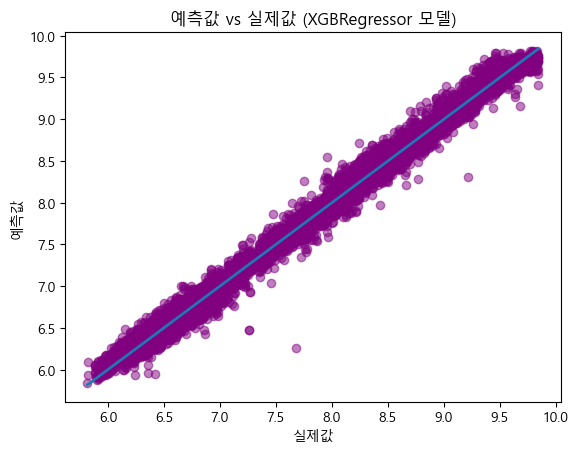

In [20]:
get_scatter(best_xgb_rg, y_test, xgb_y_pred)

MAE: 0.0727
RMSE: 0.0975
R2 Score: 0.9908


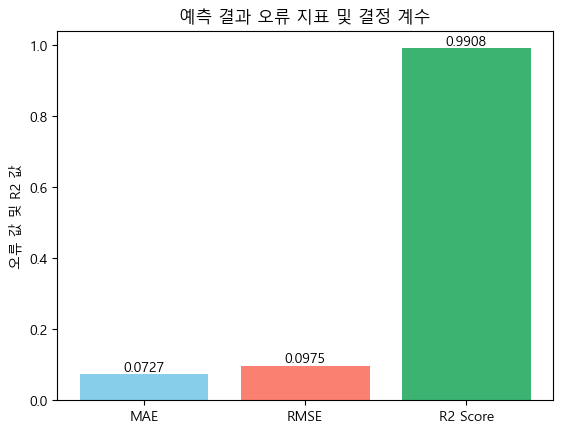

In [21]:
get_errors_score(y_test, xgb_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.997578,0.747553,0.250025
1,14024,0.994932,0.786870,0.208061
2,23733,0.993935,0.795462,0.198474
3,33442,0.993449,0.809881,0.183568
4,43152,0.993188,0.808597,0.184591


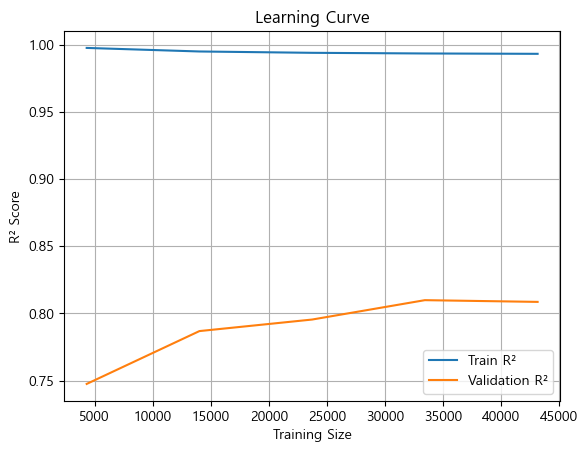

In [22]:
display_learning_curves(X, y, best_xgb_rg, cv=5, shuffle=True)

In [23]:
#  수동 파라미터 조절
from xgboost import XGBRegressor

re_xgb_rg = XGBRegressor(
    random_state=42,
    learning_rate=0.01,
    n_estimators=1500,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=5
)

re_xgb_rg.fit(X_train, y_train)

xgb_y_pred = re_xgb_rg.predict(X_test)

xgb_mae, xgb_rmse, xgb_r2 = get_best_mse_r2score(y_test, xgb_y_pred)

best 평균제곱오차 (MSE): 0.011135730059646137
best 평균제곱근오차 (RMSE): 0.10552596865059395
best 평균절대오차 (MAE): 0.08068885261337967
best 결정계수 (r2_score): 0.9891920404308445


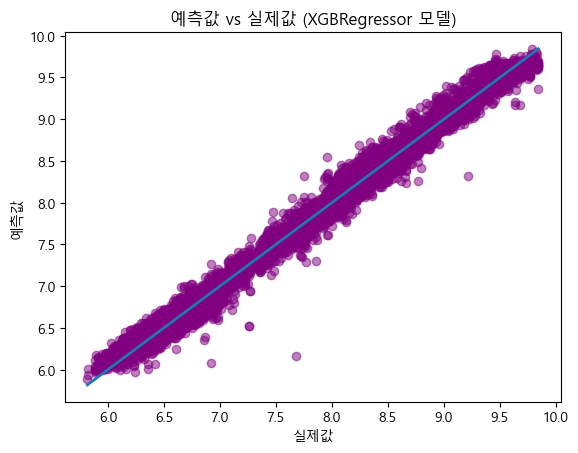

In [24]:
get_scatter(re_xgb_rg, y_test, xgb_y_pred)

MAE: 0.0807
RMSE: 0.1055
R2 Score: 0.9892


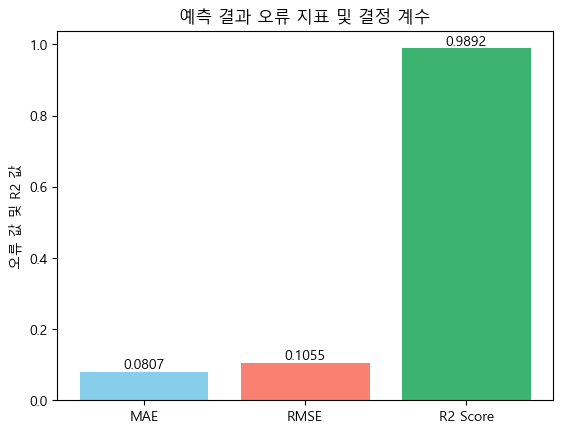

In [25]:
get_errors_score(y_test, xgb_y_pred)

,Training Size,Train R²,Validation R²,Gap
0,4315,0.989724,0.800225,0.189499
1,14024,0.989664,0.806408,0.183256
2,23733,0.989535,0.811785,0.177750
3,33442,0.989452,0.814454,0.174998
4,43152,0.989398,0.814931,0.174468


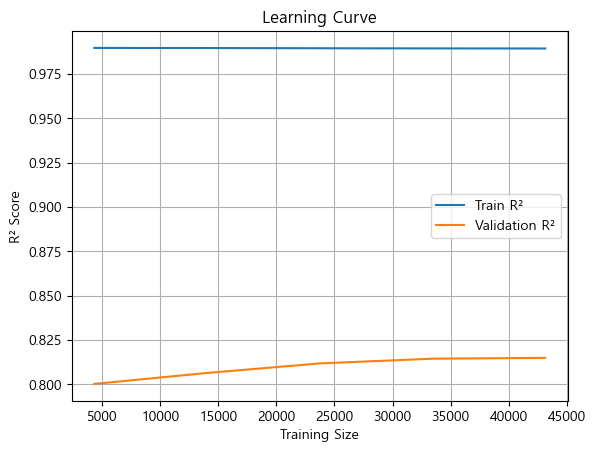

In [26]:
display_learning_curves(X, y, re_xgb_rg, cv=5, shuffle=True)

### LightGBM

In [27]:
# 디폴트
from lightgbm import LGBMRegressor

lgbm_rg = LGBMRegressor(random_state=42)

lgbm_rg.fit(X_train, y_train)

y_pred = lgbm_rg.predict(X_test)

mae, rmse, r2 = get_mse_r2score2(y_test, y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000458 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 23
[LightGBM] [Info] Start training from score 7.789647
평균제곱오차 (MSE): 0.009945931867356874
평균제곱근오차 (RMSE): 0.0997292929251826
평균절대오차 (MAE): 0.07521715383753577
결정계수 (r2_score): 0.9903468179522857


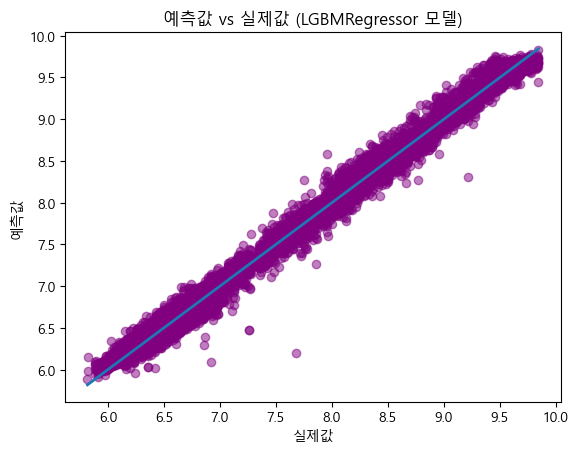

In [28]:
get_scatter(lgbm_rg, y_test, y_pred)

MAE: 0.0752
RMSE: 0.0997
R2 Score: 0.9903


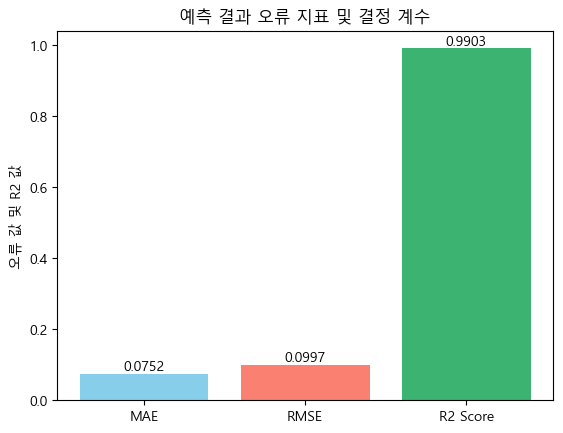

In [29]:
get_errors_score(y_test, y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 4315, number of used features: 23
[LightGBM] [Info] Start training from score 7.735563
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 14024, number of used features: 23
[LightGBM] [Info] Start training from score 7.737382
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testi

,Training Size,Train R²,Validation R²,Gap
0,4315,0.992428,0.823118,0.169310
1,14024,0.991484,0.800086,0.191397
2,23733,0.991228,0.808037,0.183190
3,33442,0.991078,0.803806,0.187272
4,43152,0.990996,0.808620,0.182377


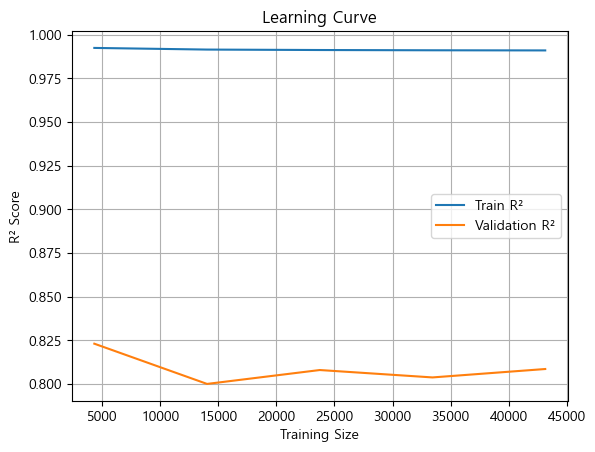

In [30]:
display_learning_curves(X, y, lgbm_rg, cv=5, shuffle=True)

In [32]:
# 최적화 모델
best_lgbm_rg = LGBMRegressor(random_state=42)

# 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5, -1],
    'num_leaves': [31, 50],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


grid_search = GridSearchCV(
    estimator=best_lgbm_rg,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# 최적 파라미터 및 점수
print("최적 파라미터:", grid_search.best_params_)
print("최적 R2 (CV 평균):", grid_search.best_score_)

# 최적 모델로 예측
best_model = grid_search.best_estimator_
lgbm_y_pred = best_model.predict(X_test)

# 성능 평가
lgbm_mae, lgbm_rmse, lgbm_r2 = get_best_mse_r2score(y_test, lgbm_y_pred)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 23
[LightGBM] [Info] Start training from score 7.789647
최적 파라미터: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 50, 'subsample': 0.8}
최적 R2 (CV 평균): 0.9907895858632833
best 평균제곱오차 (MSE): 0.009498976562514801
best 평균제곱근오차 (RMSE): 0.0974626931831601
best 평균절대오차 (MAE): 0.07281927968633332
best 결정계수 (r2_score): 0.9907806175180149


In [35]:
from lightgbm import LGBMRegressor

best_lgbm_rg = LGBMRegressor(random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=-1, n_estimators=200, num_leaves=50, subsample=0.8)

best_lgbm_rg.fit(X_train, y_train)

lgbm_y_pred = best_lgbm_rg.predict(X_test)

lgbm_mae, lgbm_rmse, lgbm_r2 = get_best_mse_r2score(y_test, lgbm_y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 23
[LightGBM] [Info] Start training from score 7.789647
best 평균제곱오차 (MSE): 0.009498976562514801
best 평균제곱근오차 (RMSE): 0.0974626931831601
best 평균절대오차 (MAE): 0.07281927968633332
best 결정계수 (r2_score): 0.9907806175180149


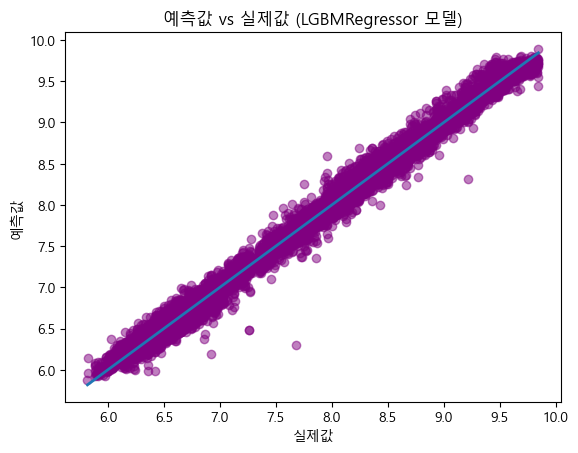

In [36]:
get_scatter(best_lgbm_rg, y_test, lgbm_y_pred)

MAE: 0.0728
RMSE: 0.0975
R2 Score: 0.9908


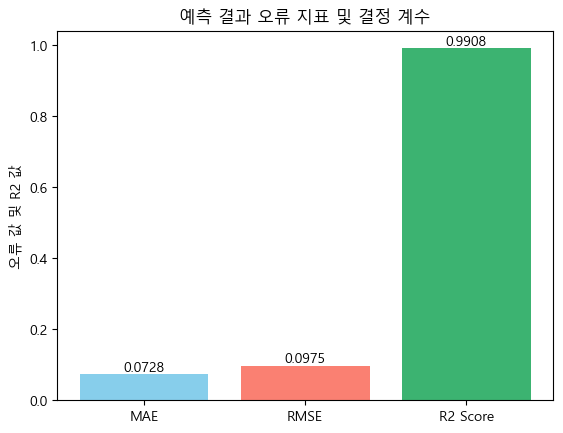

In [37]:
get_errors_score(y_test, lgbm_y_pred)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000100 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 343
[LightGBM] [Info] Number of data points in the train set: 4315, number of used features: 23
[LightGBM] [Info] Start training from score 7.725666
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 448
[LightGBM] [Info] Number of data points in the train set: 14024, number of used features: 23
[LightGBM] [Info] Start training from score 7.717639
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Inf

,Training Size,Train R²,Validation R²,Gap
0,4315,0.995432,0.845615,0.149817
1,14024,0.993480,0.815018,0.178462
2,23733,0.992844,0.831090,0.161754
3,33442,0.992559,0.831866,0.160694
4,43152,0.992391,0.838764,0.153627


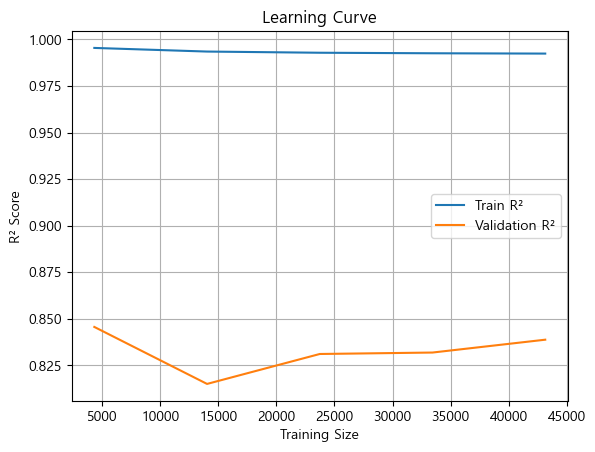

In [38]:
display_learning_curves(X, y, best_lgbm_rg, cv=5, shuffle=True)

### 최종

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

results = {}

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = format(mean_absolute_error(y_test, y_pred), '.4f')
    rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)), '.4f')
    r2 = format(r2_score(y_test, y_pred), '.4f')
    results[name] = {'MAE':mae,'RMSE': rmse, 'R2': r2}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 535
[LightGBM] [Info] Number of data points in the train set: 43152, number of used features: 23
[LightGBM] [Info] Start training from score 7.789647


In [40]:
# 결과 출력
results_df = pd.DataFrame(results).T
print(results_df)

                      MAE    RMSE       R2
Linear Regression  0.1617  0.2092   0.9575
Ridge              0.1617  0.2092   0.9575
Lasso              0.8761  1.0151  -0.0001
Random Forest      0.0814  0.1106   0.9881
XGBoost            0.0746  0.0994   0.9904
LightGBM           0.0752  0.0997   0.9903


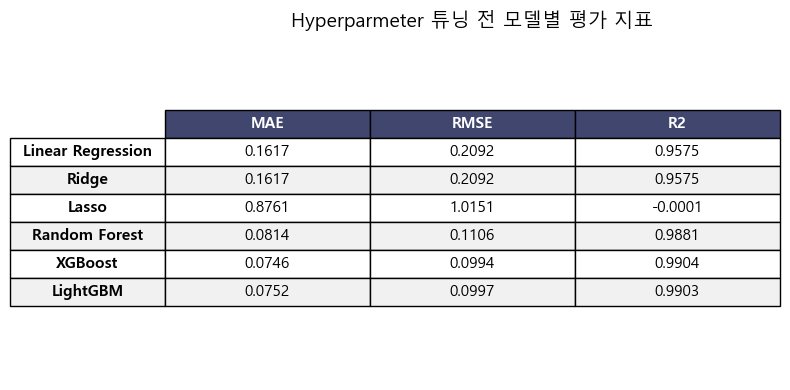

In [41]:
# 결과 정렬
results_sorted = results_df

# 'MAE', 'RMSE', 'R2' 열을 float으로 변환
results_sorted['MAE'] = pd.to_numeric(results_sorted['MAE'], errors='coerce')
results_sorted['RMSE'] = pd.to_numeric(results_sorted['RMSE'], errors='coerce')
results_sorted['R2'] = pd.to_numeric(results_sorted['R2'], errors='coerce')

# 플롯 사이즈 지정
fig, ax = plt.subplots(figsize=(8, 4))  # 표 크기 조절 가능

# x, y 축 숨기기
ax.axis('off')

# 테이블 추가
table = ax.table(cellText=np.round(results_sorted.values,4),
                 colLabels=results_sorted.columns,
                 rowLabels=results_sorted.index,
                 cellLoc='center',
                 rowLoc='center',
                 loc='center')

table.scale(1, 1.5)  # 셀 크기 조절
table.auto_set_font_size(False)
table.set_fontsize(11)

# 셀 배경색 (헤더 강조)
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
    if row == 0:
        cell.set_facecolor('#40466e')  # 헤더 배경
        cell.set_text_props(color='w')  # 헤더 텍스트 색
    elif row % 2 == 0:
        cell.set_facecolor('#f1f1f2')  # 짝수행 배경
    else:
        cell.set_facecolor('#ffffff')  # 홀수행 배경

plt.title("Hyperparmeter 튜닝 전 모델별 평가 지표", fontsize=14)
plt.tight_layout()
plt.show()


In [42]:
results_sorted_dict = results_sorted.T.to_dict()
results_sorted_dict

{'Linear Regression': {'MAE': 0.1617, 'RMSE': 0.2092, 'R2': 0.9575},
 'Ridge': {'MAE': 0.1617, 'RMSE': 0.2092, 'R2': 0.9575},
 'Lasso': {'MAE': 0.8761, 'RMSE': 1.0151, 'R2': -0.0001},
 'Random Forest': {'MAE': 0.0814, 'RMSE': 0.1106, 'R2': 0.9881},
 'XGBoost': {'MAE': 0.0746, 'RMSE': 0.0994, 'R2': 0.9904},
 'LightGBM': {'MAE': 0.0752, 'RMSE': 0.0997, 'R2': 0.9903}}

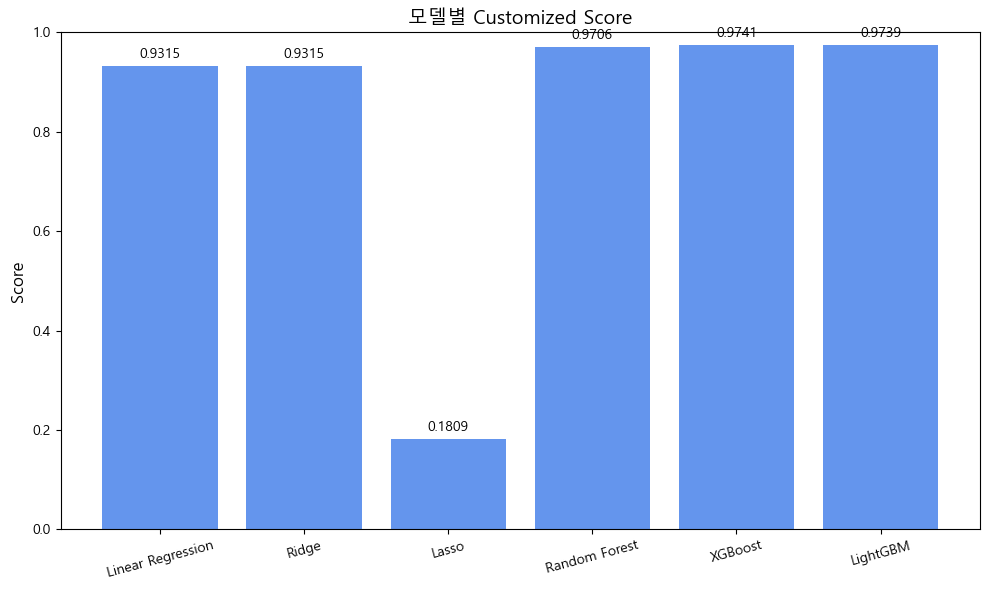

In [43]:
# score = 1 - (0.2 * (MAE / IQR) + 0.2 * (RMSE / IQR) + 0.6 * (1 - R²))
def calculate_custom_score(mae, rmse, r2, iqr):
    """
    사용자 정의 회귀 성능 스코어 계산 함수.
    예측력을 강조하여 R²에 높은 가중치를 부여함.

    Parameters:
    - mae
    - rmse
    - r2
    - iqr

    Returns:
    - custom_score: 0~1 사이의 스코어, 1에 가까울수록 성능이 우수
    """

    # 정규화된 지표 계산
    mae_norm = mae / iqr
    rmse_norm = rmse / iqr
    r2_loss = 1 - r2  # r2는 클수록 좋으므로 '오차'처럼 다룸

    # 사용자 정의 스코어 (가중 평균)
    score = 1 - (0.2 * mae_norm + 0.2 * rmse_norm + 0.6 * r2_loss)

    return score
math = results_sorted_dict
q75, q25 = np.percentile(y_test, [75, 25])
iqr = q75 - q25

scores = {}
for model, metrics in math.items():
    score = calculate_custom_score(metrics["MAE"], metrics["RMSE"], metrics["R2"], iqr)
    scores[model] = score

# 막대그래프 시각화
models = list(scores.keys())
score_values = list(scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, score_values, color='cornflowerblue')
plt.title("모델별 Customized Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

In [44]:
results_dict = {}
def get_mse_r2score_all(model, y_test, y_pred,model_name):
    if hasattr(model, 'coef_'):
        print("계수 (coef_):\n", model.coef_)
        print("절편 (intercept):", model.intercept_)
    else:
        print("이 모델은 계수(coef_)와 절편(intercept_)을 제공하지 않습니다.")

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mae)
    r2 = r2_score(y_test, y_pred)

    print("평균절대오차 (MAE):", mae)
    print("평균제곱근오차 (RMSE):", rmse)
    print("결정계수 (R² Score):", r2)

    results_dict[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    return mae, rmse, r2


In [48]:
models = {
    "Ridge": Ridge(alpha=0.05, solver='sag'),
    "Lasso": Lasso(alpha=0.0001),
    "LassoCV": LassoCV(cv=5, random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300),
    "XGBoost":XGBRegressor(random_state=42, colsample_bytree=1, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8),
    "LightGBM": LGBMRegressor(random_state=42, colsample_bytree=1.0, learning_rate=0.1, max_depth=-1, n_estimators=200, num_leaves=50, subsample=0.8)
}


In [49]:
results_dict = {}
def get_mse_r2score_all(model, y_test, y_pred,model_name):
    if hasattr(model, 'coef_'):
        print("계수 (coef_):\n", model.coef_)
        print("절편 (intercept):", model.intercept_)
    else:
        print("이 모델은 계수(coef_)와 절편(intercept_)을 제공하지 않습니다.")

    mae = format(mean_absolute_error(y_test, y_pred), '.4f')
    rmse = format(np.sqrt(mean_squared_error(y_test, y_pred)), '.4f')
    r2 = format(r2_score(y_test, y_pred), '.4f')

    print("평균절대오차 (MAE):", mae)
    print("평균제곱근오차 (RMSE):", rmse)
    print("결정계수 (R² Score):", r2)

    results_dict[model_name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    return mae, rmse, r2


In [50]:
for name, model in models.items():
    print(f"\n▶ {name} 결과:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    get_mse_r2score_all(model, y_test, y_pred,name)



▶ Ridge 결과:
계수 (coef_):
 [ 1.0882188  -0.00150625  0.00190928 -0.07891858 -0.00976807  0.05873243
  0.01832642  0.0116278   0.2271711   0.16733869  0.14275392  0.06674042
 -0.05646002 -0.19754269 -0.35000143 -0.73717243  0.36020024 -0.06132187
 -0.2513213   0.13272423  0.06297153  0.27027094  0.22364867]
절편 (intercept): 7.581322046205884
평균절대오차 (MAE): 0.1617
평균제곱근오차 (RMSE): 0.2092
결정계수 (R² Score): 0.9575

▶ Lasso 결과:
계수 (coef_):
 [ 1.08734355 -0.00200652  0.00166711 -0.08731629 -0.02012218  0.04652847
  0.00608799  0.          0.15894234  0.0995114   0.07518283  0.
 -0.12262106 -0.26306659 -0.4146806  -0.82578617  0.26079362 -0.15643581
 -0.34586472  0.03615005 -0.0321974   0.17262004  0.12662134]
절편 (intercept): 7.769658209802103
평균절대오차 (MAE): 0.1616
평균제곱근오차 (RMSE): 0.2092
결정계수 (R² Score): 0.9575

▶ LassoCV 결과:
계수 (coef_):
 [ 1.08004898e+00 -5.76085445e-03  0.00000000e+00 -6.00723647e-02
 -9.46335211e-03  4.16937407e-02  8.31441747e-04  0.00000000e+00
  1.45220180e-01  8.94505648e-02

In [51]:
results_df = pd.DataFrame(results_dict).T
print(results_df)

                 MAE    RMSE      R2
Ridge         0.1617  0.2092  0.9575
Lasso         0.1616  0.2092  0.9575
LassoCV       0.1616  0.2094  0.9574
RandomForest  0.0769  0.1029  0.9897
XGBoost       0.0727  0.0975  0.9908
LightGBM      0.0728  0.0975  0.9908


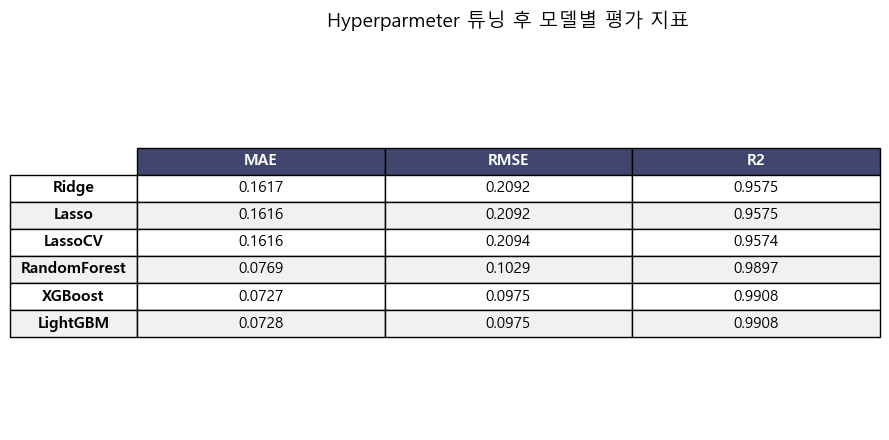

In [52]:
import matplotlib.pyplot as plt

# 결과 정렬
results_sorted = results_df

# 'MAE', 'RMSE', 'R2' 열을 float으로 변환
results_sorted['MAE'] = pd.to_numeric(results_sorted['MAE'], errors='coerce')
results_sorted['RMSE'] = pd.to_numeric(results_sorted['RMSE'], errors='coerce')
results_sorted['R2'] = pd.to_numeric(results_sorted['R2'], errors='coerce')


# 테이블 시각화
fig, ax = plt.subplots(figsize=(9, 4.5))  # 전체 도표 크기

# 축 숨기기
ax.axis('off')

# 테이블 만들기
table = ax.table(
    cellText=results_sorted.values,  # 소수점 2자리 반올림
    colLabels=results_sorted.columns,
    rowLabels=results_sorted.index,
    cellLoc='center',
    rowLoc='center',
    loc='center'
)

# 셀 크기 및 폰트 조정
table.scale(1, 1.5)
table.auto_set_font_size(False)
table.set_fontsize(11)

# 셀 배경색 (헤더 강조)
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_text_props(weight='bold')
    if row == 0:
        cell.set_facecolor('#40466e')  # 헤더 배경
        cell.set_text_props(color='w')  # 헤더 텍스트 색
    elif row % 2 == 0:
        cell.set_facecolor('#f1f1f2')  # 짝수행 배경
    else:
        cell.set_facecolor('#ffffff')  # 홀수행 배경

plt.title("Hyperparmeter 튜닝 후 모델별 평가 지표", fontsize=14, pad=20)
plt.tight_layout()
plt.show()


In [53]:
results_sorted_dict = results_sorted.T.to_dict()
results_sorted_dict

{'Ridge': {'MAE': 0.1617, 'RMSE': 0.2092, 'R2': 0.9575},
 'Lasso': {'MAE': 0.1616, 'RMSE': 0.2092, 'R2': 0.9575},
 'LassoCV': {'MAE': 0.1616, 'RMSE': 0.2094, 'R2': 0.9574},
 'RandomForest': {'MAE': 0.0769, 'RMSE': 0.1029, 'R2': 0.9897},
 'XGBoost': {'MAE': 0.0727, 'RMSE': 0.0975, 'R2': 0.9908},
 'LightGBM': {'MAE': 0.0728, 'RMSE': 0.0975, 'R2': 0.9908}}

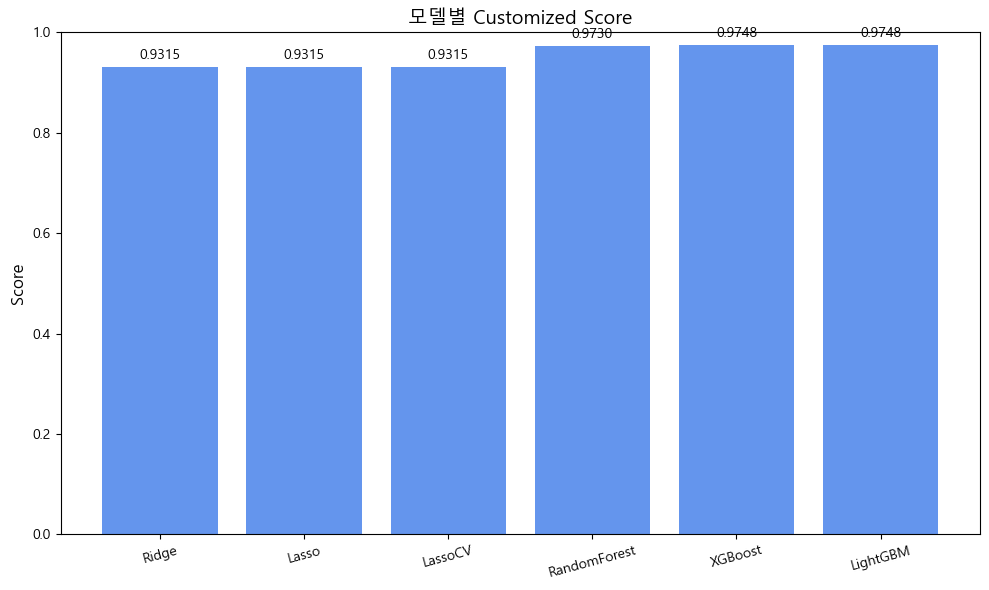

In [54]:
# score = 1 - (0.2 * (MAE / IQR) + 0.2 * (RMSE / IQR) + 0.6 * (1 - R²))
def calculate_custom_score(mae, rmse, r2, iqr):
    """
    사용자 정의 회귀 성능 스코어 계산 함수.
    예측력을 강조하여 R²에 높은 가중치를 부여함.

    Parameters:
    - mae
    - rmse
    - r2
    - iqr

    Returns:
    - custom_score: 0~1 사이의 스코어, 1에 가까울수록 성능이 우수
    """

    # 정규화된 지표 계산
    mae_norm = mae / iqr
    rmse_norm = rmse / iqr
    r2_loss = 1 - r2  # r2는 클수록 좋으므로 '오차'처럼 다룸

    # 사용자 정의 스코어 (가중 평균)
    score = 1 - (0.2 * mae_norm + 0.2 * rmse_norm + 0.6 * r2_loss)

    return score
math = results_sorted_dict
q75, q25 = np.percentile(y_test, [75, 25])
iqr = q75 - q25

scores = {}
for model, metrics in math.items():
    score = calculate_custom_score(metrics["MAE"], metrics["RMSE"], metrics["R2"], iqr)
    scores[model] = score

# 막대그래프 시각화
models = list(scores.keys())
score_values = list(scores.values())

plt.figure(figsize=(10, 6))
bars = plt.bar(models, score_values, color='cornflowerblue')
plt.title("모델별 Customized Score", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)

# 막대 위에 수치 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}',
             ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()